In [1]:
import os                                # operational system para manipulação de arquivos.
import cv2                               # opencv para manipulação de imagens.
import random
import numpy as np                       # numpy para manipulação de matrizes e arrays
import matplotlib.pyplot as plt          # pyplot para plotagem de gráficos e imagens
import zipfile                           # zipfile para lidar com arquivos compactados
import urllib.request as url             # urllib para baixar arquivos via HTTPS
from tensorflow.keras import layers      # módulo de camadas do keras
from tensorflow.keras import callbacks   # módulo de callbacks do keras
from tensorflow.keras import optimizers  # módulo de otimizadores do keras
# classe de modelos sequenciais para construir as redes neurais
from tensorflow.keras.models import Sequential   
# classe de modelos sequenciais para construir as redes neurais
from tensorflow.keras.applications import VGG16  

# gerador de dados do keras, utilizado para carregar imagens em tempo de execução
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
# método para importar modelos gerados pelo tensorflow
from tensorflow.keras.models import load_model
import glob

In [28]:
from PIL import Image

for filename in glob.glob('DR_train/DF/*.jpg'):
    direct2 =  filename + '.png'
    im1 = Image.open(filename)
    im1.save(direct2)

In [2]:
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,        # normalizando as imagens
    rotation_range = 45,       # Rotação aleatória de até 40°
    width_shift_range = 0.2,   # Translação horizontal de até 20% da largura
    height_shift_range = 0.2,  # Translação vertical de até 20% da altura
    zoom_range = 0.2,          # Zoom aleatório de até 20%
    shear_range = 0.1,         # Deformação de 10%
    horizontal_flip = True,    # Espelhamento horizontal aleatório
    vertical_flip = True,     # Espelhamento vertical aleatório
    fill_mode = "nearest")     # Preenchimentod e buracos pelo pixel mais próximo

#train_generator = train_datagen.flow_from_directory(os.path.join(".", "DR_train", "DF"),target_size = (250,250) ,class_mode = 'categorical')

# Atributo do generator que fornece o número de amostras detectadas
#train_samples = train_generator.samples 
#print(train_samples)
#DR_train/DF

### Criando pastas para o aumento de dados - treino

In [4]:
labels = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
i = 0
for class_name in labels:
    i+=1
    if not os.path.exists('DR_train/' + str(i) + 'augumentaded'):
        os.mkdir('DR_train/' + str(class_name) + 'augumentaded')

### Iniciando o aumento de dados com looping aninhados - treino

In [23]:
labels = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
k = -1
for class_name in labels:
    k+=1
    for filename in glob.glob('DR_train/Trainmodified/' + str(class_name) + 'modified/*.jpg'):
        img =  load_img(filename)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        i = 0
        for batch in train_datagen.flow(x, save_to_dir = 'DR_train/' + labels[k] + 'augumentaded' , save_prefix = 'Aug', save_format = '.jpg'):
            i+=1
            if(labels[k] == 'MEL'):
                if(i >= 2):
                    break
            elif(labels[k] == 'NV'):
                if(i >= 0):
                    break
            elif(labels[k] == 'BCC'):
                if(i >= 4):
                    break
            elif(labels[k] == 'AKIEC'):
                if(i >= 7):
                    break
            elif(labels[k] == 'BKL'):
                if(i >= 2):
                    break
            elif(labels[k] == 'DF'):
                if(i >= 20):
                    break
            elif(labels[k] == 'VASC'):
                if(i >= 15):
                    break

### Criando pastas para o aumento de dados - teste

In [24]:
labels = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
i = 0
for class_name in labels:
    i+=1
    if not os.path.exists('DR_test/' + str(i) + 'augumentaded'):
        os.mkdir('DR_test/' + str(class_name) + 'augumentaded')

### Iniciando o aumento de dados com looping aninhados - teste

In [26]:
labels = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
k = -1
for class_name in labels:
    k+=1
    for filename in glob.glob('DR_test/' + str(class_name) + 'Testemodified/*.jpg'):
        img =  load_img(filename)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        i = 0
        for batch in train_datagen.flow(x, save_to_dir = 'DR_test/' + labels[k] + 'augumentaded' , save_prefix = 'Aug', save_format = '.jpg'):
            i+=1
            if(labels[k] == 'MEL'):
                if(i >= 2):
                    break
            elif(labels[k] == 'NV'):
                if(i >= 0):
                    break
            elif(labels[k] == 'BCC'):
                if(i >= 4):
                    break
            elif(labels[k] == 'AKIEC'):
                if(i >= 7):
                    break
            elif(labels[k] == 'BKL'):
                if(i >= 2):
                    break
            elif(labels[k] == 'DF'):
                if(i >= 20):
                    break
            elif(labels[k] == 'VASC'):
                if(i >= 15):
                    break

### Criando pastas para o aumento de dados - validação

In [27]:
labels = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
i = 0
for class_name in labels:
    i+=1
    if not os.path.exists('DR_validation/' + str(i) + 'augumentaded'):
        os.mkdir('DR_validation/' + str(class_name) + 'augumentaded')

### Iniciando o aumento de dados com looping aninhados - validação

In [28]:
labels = ['MEL', 'NV', 'BCC', 'AKIEC', 'BKL', 'DF', 'VASC']
k = -1
for class_name in labels:
    k+=1
    for filename in glob.glob('DR_validation/' + str(class_name) + 'Validmodified/*.jpg'):
        img =  load_img(filename)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        i = 0
        for batch in train_datagen.flow(x, save_to_dir = 'DR_validation/' + labels[k] + 'augumentaded' , save_prefix = 'Aug', save_format = '.jpg'):
            i+=1
            if(labels[k] == 'MEL'):
                if(i >= 2):
                    break
            elif(labels[k] == 'NV'):
                if(i >= 0):
                    break
            elif(labels[k] == 'BCC'):
                if(i >= 4):
                    break
            elif(labels[k] == 'AKIEC'):
                if(i >= 7):
                    break
            elif(labels[k] == 'BKL'):
                if(i >= 2):
                    break
            elif(labels[k] == 'DF'):
                if(i >= 20):
                    break
            elif(labels[k] == 'VASC'):
                if(i >= 15):
                    break

In [60]:
val_datagen   = ImageDataGenerator( rescale = 1./255 )
val_generator = val_datagen.flow_from_directory("DR_validation/DR_validation_aumentada", target_size = (250, 250),
                                                 batch_size  = 64)

Found 530 images belonging to 7 classes.


In [61]:
from collections import Counter

counter = Counter(val_generator.classes)
counter

Counter({0: 76, 1: 64, 2: 68, 3: 100, 4: 50, 5: 157, 6: 15})

In [62]:
class_to_idx_dict = val_generator.class_indices
print( "Mapeamento Classes -> Índices:", class_to_idx_dict )

Mapeamento Classes -> Índices: {'AKIECaugumentaded': 0, 'BCCaugumentaded': 1, 'BKLaugumentaded': 2, 'DFaugumentaded': 3, 'MELaugumentaded': 4, 'NVaugumentaded': 5, 'VASCaugumentaded': 6}


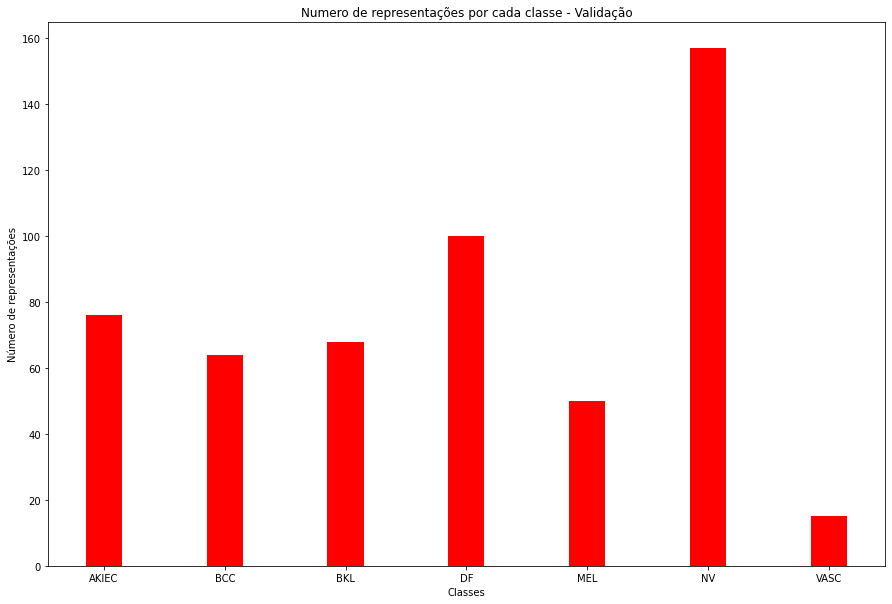

In [63]:
lista = {'AKIEC': 0, 'BCC': 1, 'BKL': 2, 'DF': 3, 'MEL': 4, 'NV': 5, 'VASC': 6}

classes = list(lista)
values = list(counter.values())
  
fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(classes, values, color ='red',
        width = 0.3)
 
plt.xlabel("Classes")
plt.ylabel("Número de representações")
plt.title("Numero de representações por cada classe - Validação")
plt.show()

In [64]:
val_datagen   = ImageDataGenerator( rescale = 1./255 )
val_generator = val_datagen.flow_from_directory("DR_train/DR_train_aumentada", target_size = (250, 250),
                                                 batch_size  = 64)

Found 13967 images belonging to 7 classes.


In [65]:
counter = Counter(val_generator.classes)
counter

Counter({0: 2059, 1: 1854, 2: 1972, 3: 2049, 4: 2012, 5: 2100, 6: 1921})

In [66]:
class_to_idx_dict = val_generator.class_indices
print( "Mapeamento Classes -> Índices:", class_to_idx_dict )

Mapeamento Classes -> Índices: {'AKIECaugumentaded': 0, 'BCCaugumentaded': 1, 'BKLaugumentaded': 2, 'DFaugumentaded': 3, 'MELaugumentaded': 4, 'NVaugumentaded': 5, 'VASCaugumentaded': 6}


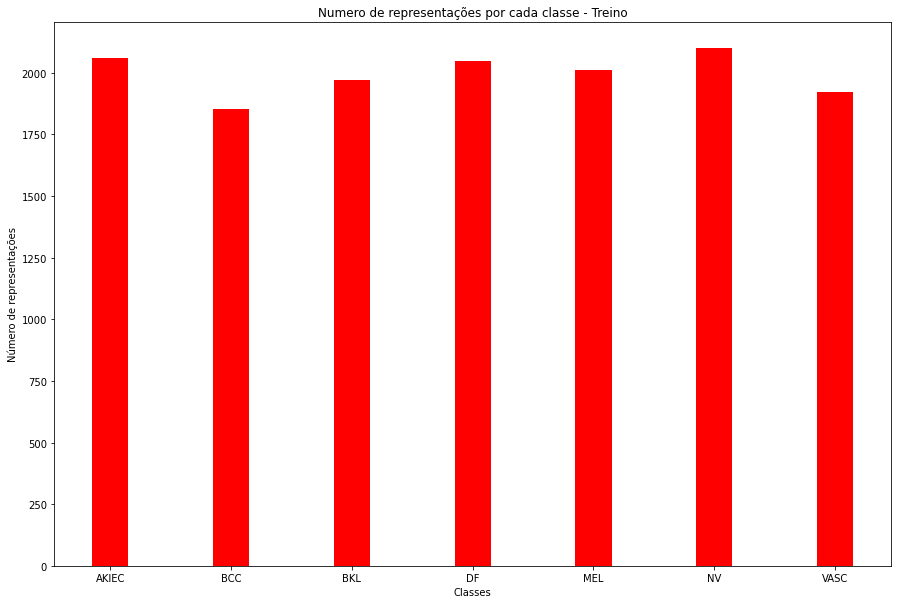

In [67]:
lista = {'AKIEC': 0, 'BCC': 1, 'BKL': 2, 'DF': 3, 'MEL': 4, 'NV': 5, 'VASC': 6}

classes = list(lista)
values = list(counter.values())
  
fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(classes, values, color ='red',
        width = 0.3)
 
plt.xlabel("Classes")
plt.ylabel("Número de representações")
plt.title("Numero de representações por cada classe - Treino")
plt.show()

In [68]:
val_datagen   = ImageDataGenerator( rescale = 1./255 )
val_generator = val_datagen.flow_from_directory("DR_test/DR_test_aumentada", target_size = (250, 250),
                                                 batch_size  = 64)

Found 482 images belonging to 7 classes.


In [69]:
counter = Counter(val_generator.classes)
counter

Counter({0: 49, 1: 39, 2: 59, 3: 59, 4: 70, 5: 161, 6: 45})

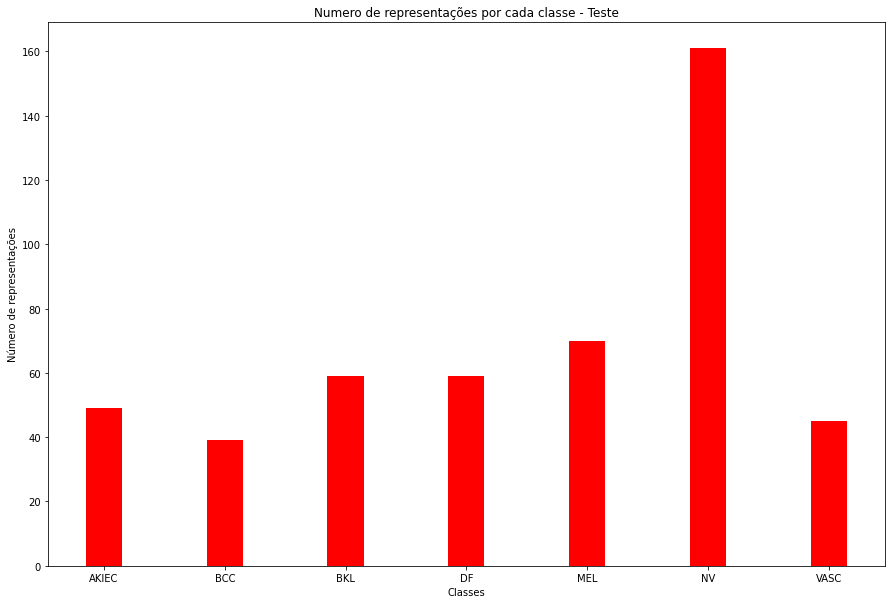

In [70]:
lista = {'AKIEC': 0, 'BCC': 1, 'BKL': 2, 'DF': 3, 'MEL': 4, 'NV': 5, 'VASC': 6}

classes = list(lista)
values = list(counter.values())
  
fig = plt.figure(figsize = (15, 10))
 
# creating the bar plot
plt.bar(classes, values, color ='red',
        width = 0.3)
 
plt.xlabel("Classes")
plt.ylabel("Número de representações")
plt.title("Numero de representações por cada classe - Teste")
plt.show()